<center><h2>
<a href="https://masumbhai.me">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [27]:
import pandas as pd
import numpy as np
from dask import dataframe as dd
from dask.distributed import Client
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\Cleaned_Data.csv"
df = readCSV_Function(filePath)
df = shuffle(df)

<center><h2 style="background:#00FFFF;color:black">
Visualization on "Label" Column
</h2></center>

In [9]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
df["Label"].value_counts()

DrDoS_SSDP       29977
TFTP             29947
DrDoS_UDP        29944
Syn              29934
DrDoS_MSSQL      29694
DrDoS_NTP        29660
DrDoS_SNMP       29523
DrDoS_DNS        29177
UDP-lag          28688
DrDoS_LDAP       28617
DrDoS_NetBIOS    17421
BENIGN            6279
WebDDoS            139
Name: Label, dtype: int64

Here, we noticed that, the amount of Benign & WebDDOS is very much little

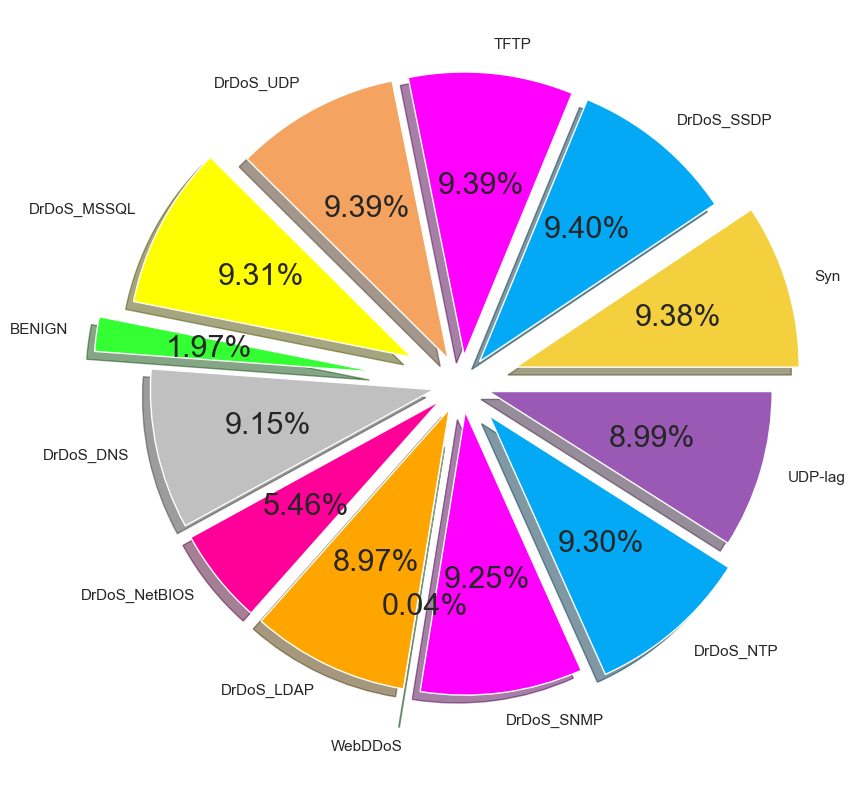

In [21]:
labels = ["Syn","DrDoS_SSDP","TFTP","DrDoS_UDP","DrDoS_MSSQL","BENIGN","DrDoS_DNS","DrDoS_NetBIOS","DrDoS_LDAP","WebDDoS","DrDoS_SNMP","DrDoS_NTP","UDP-lag"]
sizes = [len(df[df["Label"]=="Syn"]),
         len(df[df["Label"]=="DrDoS_SSDP"]),
         len(df[df["Label"]=="TFTP"]),
         len(df[df["Label"]=="DrDoS_UDP"]),
         len(df[df["Label"]=="DrDoS_MSSQL"]),
         len(df[df["Label"]=="BENIGN"]),
         len(df[df["Label"]=="DrDoS_DNS"]),
         len(df[df["Label"]=="DrDoS_NetBIOS"]),
         len(df[df["Label"]=="DrDoS_LDAP"]),
         len(df[df["Label"]=="WebDDoS"]),
         len(df[df["Label"]=="DrDoS_SNMP"]),
         len(df[df["Label"]=="DrDoS_NTP"]),
         len(df[df["Label"]=="UDP-lag"])]
colors = ["#F4D03F",
          "#03A9F4",
          "magenta",
          "#F4A460",
          "yellow",
          "#33FF33",
          "#C0C0C0",
          "#FF0099",
          "orange",
          "#66FF66",
          "#FF00FF",
          "#03A9F4",
          "#9B59B6"]
explodes = (0.2,0.1,0.1,0.1,0.2,0.3,0.1,0.1,0.1,0.2,0.1,0.15,0.1)
# len(labels), len(sizes), len(colors), len(explode)

imgName = "DDOS_Distribution.png"

plt.rcParams.update({"font.size":22})
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,explode=explodes,colors=colors,autopct = '%1.2f%%',shadow=True)
plt.axis('equal')

plt.savefig(imgPath+imgName)
plt.show()

<center><h4 style="background:yellow;color:black">
Now need to find out the prominent features among 78 features<br/>
Now need to analyze the data distribution on the target feature
</center></h4>

#### Flow Packets/s

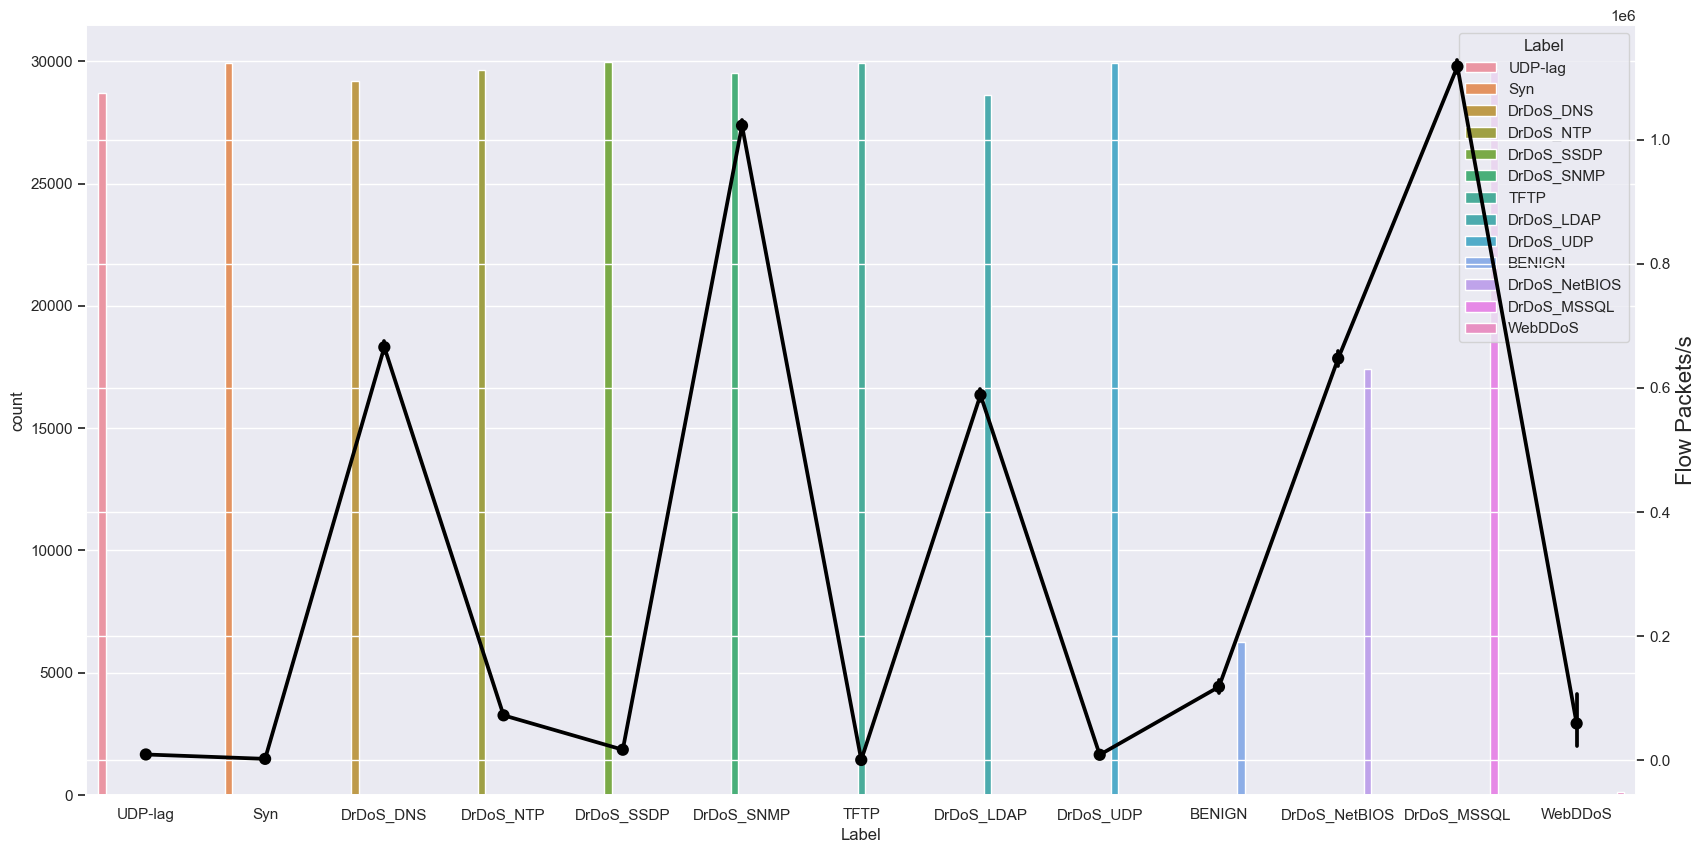

In [28]:
imgName = "Flow_Packets_per_second.png"
plt.figure(figsize=(20,10))
g1 = sns.countplot(x="Label",hue="Label",data=df)
gf1 = g1.twinx()
gf1 = sns.pointplot(x="Label",y="Flow Packets/s",data=df,color="black")
gf1.set_ylabel("Flow Packets/s",fontsize=16)
plt.savefig(imgPath+imgName)

#### Flow Bytes/s

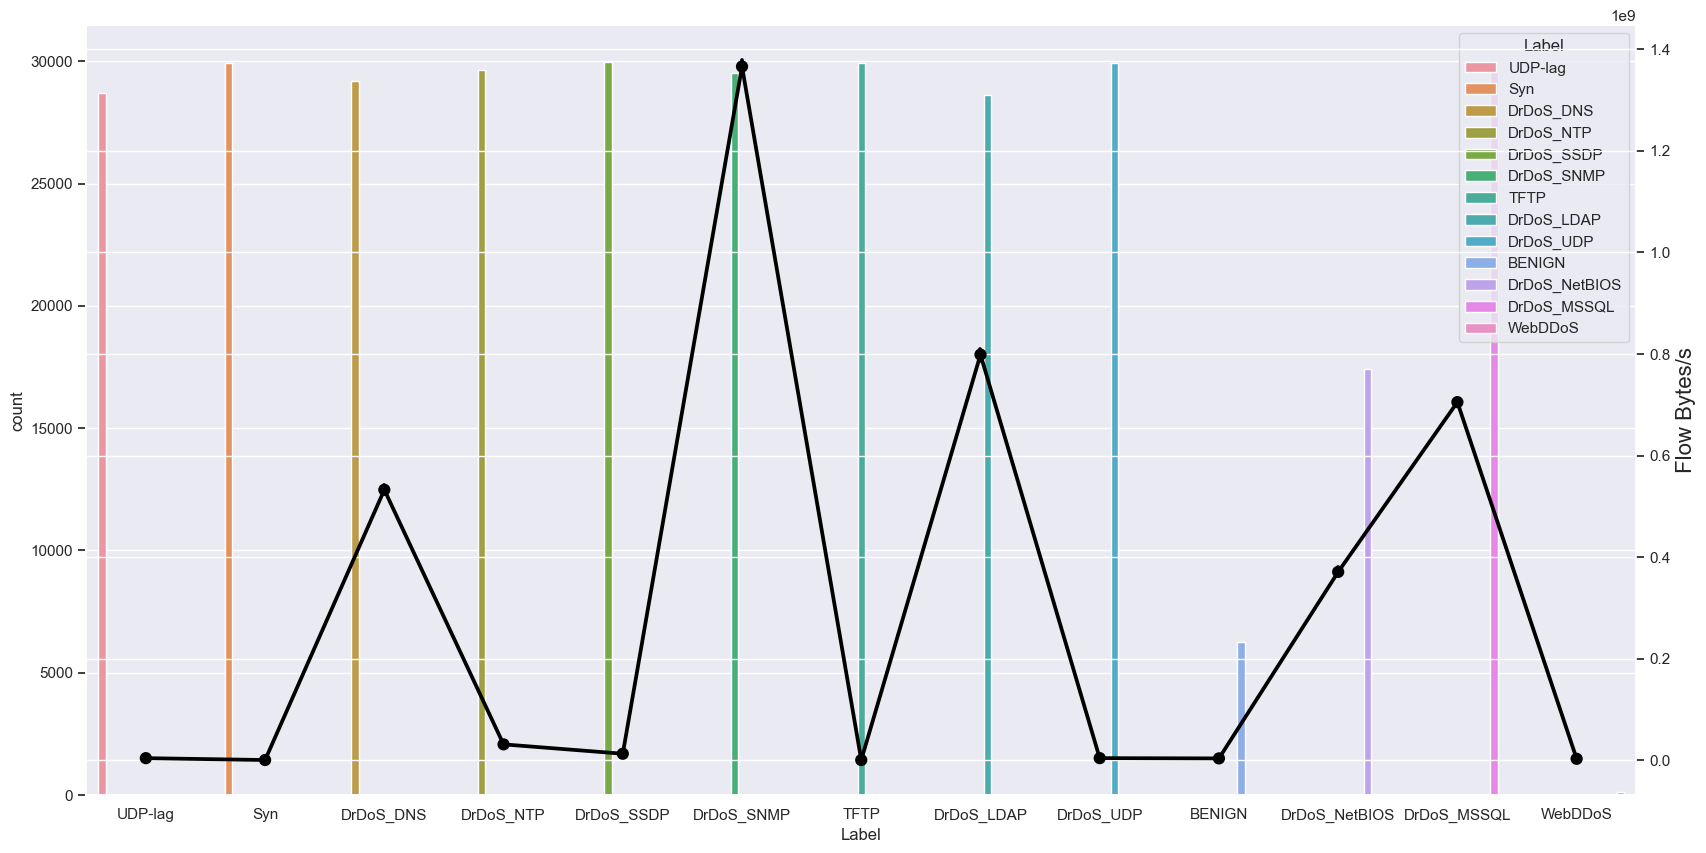

In [29]:
imgName = "Flow_Bytes_per_second.png"
plt.figure(figsize=(20,10))
g1 = sns.countplot(x="Label",hue="Label",data=df)
gf2 = g1.twinx()
gf2 = sns.pointplot(x="Label",y="Flow Bytes/s",data=df,color="black")
gf2.set_ylabel("Flow Bytes/s",fontsize=16)
plt.savefig(imgPath+imgName)

#### Protocols {Hop-to-Hop, TCP, UDP}

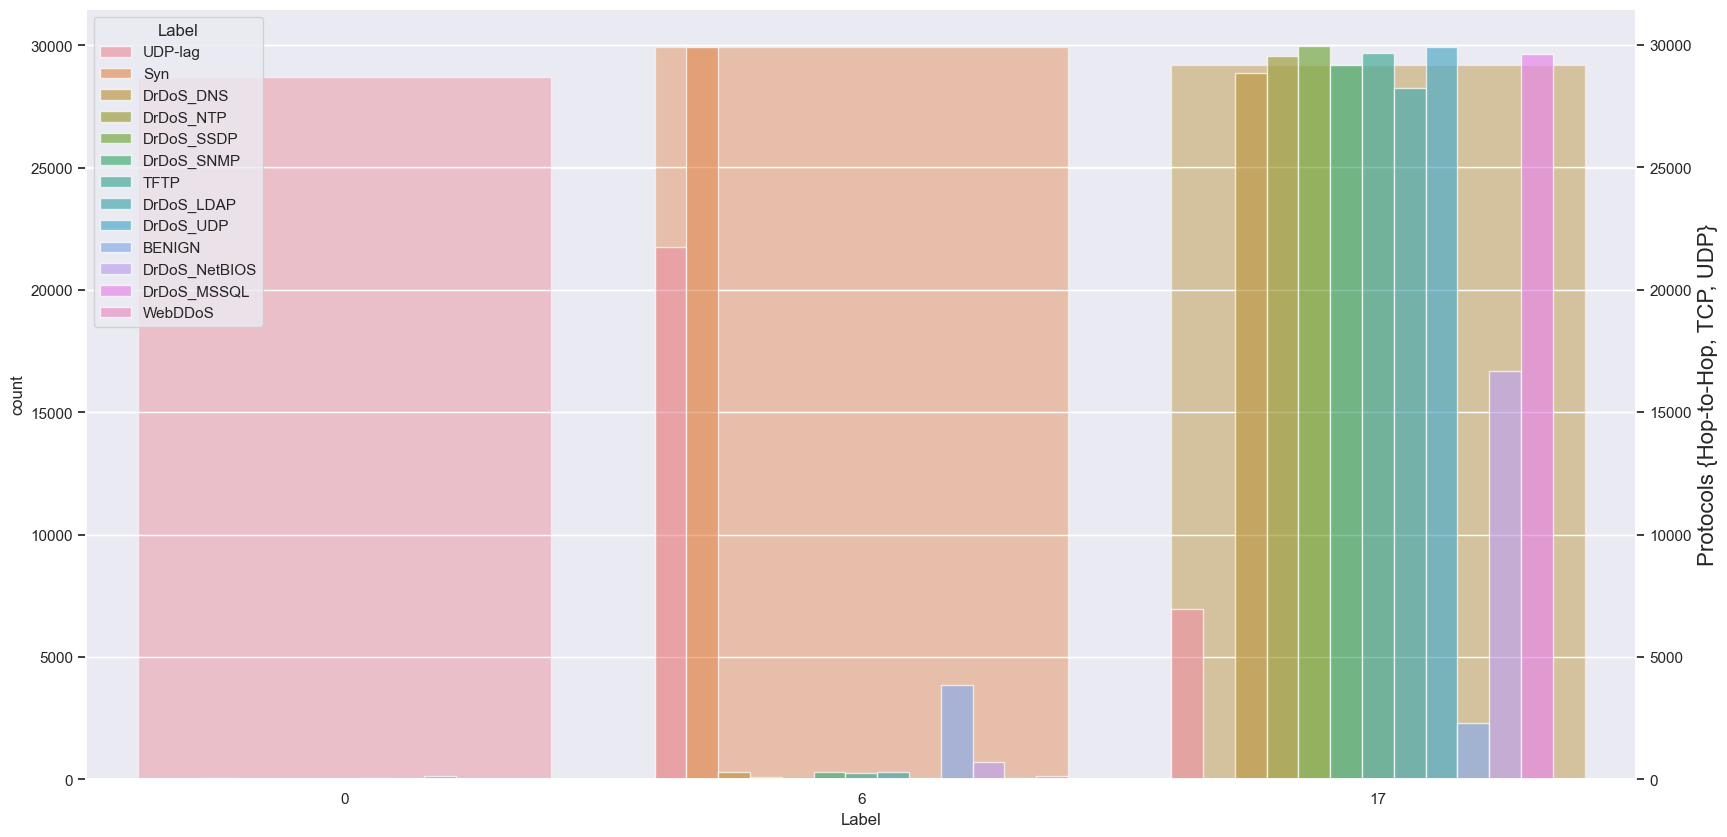

In [33]:
imgName = "protocols.png"
plt.figure(figsize=(20,10))
g1 = sns.countplot(x="Label",data=df,alpha=0.5)
gf2 = g1.twinx()
gf2 = sns.countplot(x="Protocol",hue="Label",data=df,alpha=0.7)
gf2.set_ylabel("Protocols {Hop-to-Hop, TCP, UDP}",fontsize=16)
plt.savefig(imgPath+imgName)